In [2]:
import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn

In [14]:
ess9 = pd.read_csv(os.path.relpath("Data/ESS9-20220626.csv"))
print(ess9.shape)
ess9.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/ESS9-20220626.csv'

In [152]:
key = ess9.iloc[:, [5,9]]
cntrycodes = pd.read_csv(os.path.relpath("Data/iso3166_alpha2_codes.csv"))
countrykey = pd.merge(key, cntrycodes, left_on = "cntry", right_on = "ISO2")
countrykey
#https://www.eea.europa.eu/data-and-maps/data/waterbase-lakes-4/country-codes-and-abbreviations-32-records/country-codes-and-abbreviations-32-records

,cntry,region,ISO2,Country name
0,AT,AT22,AT,Austria
1,AT,AT21,AT,Austria
2,AT,AT33,AT,Austria
3,AT,AT21,AT,Austria
4,AT,AT32,AT,Austria
...,...,...,...,...
44833,SI,SI021,SI,Slovenia
44834,SI,SI021,SI,Slovenia
44835,SI,SI012,SI,Slovenia
44836,SI,SI012,SI,Slovenia


In [175]:
colors = pd.read_csv(os.path.relpath("Data/ColorTablePCmap-20220627.txt"), sep='\t', header = None)
colors

,0,1
0,Germany,gold1
1,Netherlands,orange
2,Austria,tan3
3,Luxembourg,yellow
4,Czech Republic,yellowgreen
5,Hungary,gold2
6,Slovakia,gold3
7,Sweden,aquamarine4
8,Norway,aquamarine2
9,Denmark,aquamarine3


In [98]:
#ess9.columns.get_loc("ipcrtiv"), ess9.columns.get_loc("impfun")
ess9 = ess9.set_index('region').loc[:, 'ipcrtiv':'impfun']
ess9.replace(7, np.NaN, inplace = True)
ess9.replace(8, np.NaN, inplace = True)
ess9.replace(9, np.NaN, inplace = True)

In [105]:
ess9["iphlppl"].unique(), ess9.shape, ess9.dtypes

(array([ 2.,  3.,  1.,  6.,  5.,  4., nan]),
 (49519, 21),
 ipcrtiv    float64
 imprich    float64
 ipeqopt    float64
 ipshabt    float64
 impsafe    float64
 impdiff    float64
 ipfrule    float64
 ipudrst    float64
 ipmodst    float64
 ipgdtim    float64
 impfree    float64
 iphlppl    float64
 ipsuces    float64
 ipstrgv    float64
 ipadvnt    float64
 ipbhprp    float64
 iprspot    float64
 iplylfr    float64
 impenv     float64
 imptrad    float64
 impfun     float64
 dtype: object)

In [107]:
ess9comp = ess9.groupby('region').mean()
ess9comp

# ppca for nan, https://stackoverflow.com/questions/29420737/pca-with-missing-values-in-python
# https://ess-search.nsd.no/en/study/bdc7c350-1029-4cb3-9d5e-53f668b8fa74


,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
region,,,,,,,,,,,,,,,,,,,,,
99999,2.000000,6.000000,1.000000,3.000000,4.000000,2.000000,5.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,2.000000,1.000000,5.000000,3.000000
AT11,2.726190,4.423529,1.940476,2.602410,2.000000,3.642857,2.951807,2.494118,2.811765,2.717647,...,1.951807,2.929412,2.130952,4.258824,2.082353,2.294118,1.529412,1.588235,1.870588,2.917647
AT12,2.708333,4.111842,2.386813,2.671053,2.103070,3.288840,2.869757,2.521930,3.026374,2.798246,...,2.245077,3.037118,2.039911,4.048035,2.324503,2.447368,1.634573,1.772926,2.531729,2.888158
AT13,2.258252,3.904669,1.867446,2.736842,2.223301,3.003899,3.159844,2.127202,2.994163,2.526316,...,2.040777,2.753398,2.365759,3.923977,2.430799,2.727984,1.581712,1.813592,3.001946,2.935922
AT21,2.558282,4.104294,2.006135,2.625767,1.662577,3.300613,3.155280,2.257669,2.705521,2.546584,...,2.024540,2.901235,2.000000,4.202454,2.171779,2.533742,1.693252,1.883436,2.147239,2.732919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKJ,2.564024,4.560976,2.137615,3.094801,2.509202,2.917178,3.605505,2.137615,2.617737,3.429878,...,1.939024,3.510703,2.317901,3.628049,2.692073,3.547401,1.871951,1.954268,3.054878,2.881098
UKK,2.637255,4.585366,2.068966,3.504902,2.666667,3.131707,3.730392,2.039216,2.568627,3.643902,...,1.800000,3.720588,2.405941,3.833333,2.809756,3.676617,1.740196,1.902439,3.063415,2.951220
UKL,2.610526,4.663158,2.147368,3.378947,2.463158,3.157895,3.673684,2.294737,2.547368,3.694737,...,1.842105,3.757895,2.410526,3.800000,2.747368,3.638298,1.821053,2.200000,2.957447,3.010526


In [109]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=21, whiten=True) 

pca.fit(ess9comp)

explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

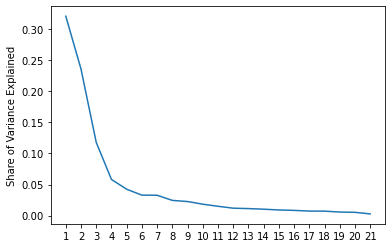

In [110]:
x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance)
plt.ylabel('Share of Variance Explained')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

In [111]:
for i in range(0, 20):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 32.04% of variance
Component  1 accounts for 23.55% of variance
Component  2 accounts for 11.78% of variance
Component  3 accounts for 5.81% of variance
Component  4 accounts for 4.24% of variance
Component  5 accounts for 3.29% of variance
Component  6 accounts for 3.28% of variance
Component  7 accounts for 2.45% of variance
Component  8 accounts for 2.27% of variance
Component  9 accounts for 1.84% of variance
Component 10 accounts for 1.50% of variance
Component 11 accounts for 1.20% of variance
Component 12 accounts for 1.13% of variance
Component 13 accounts for 1.03% of variance
Component 14 accounts for 0.91% of variance
Component 15 accounts for 0.84% of variance
Component 16 accounts for 0.73% of variance
Component 17 accounts for 0.72% of variance
Component 18 accounts for 0.58% of variance
Component 19 accounts for 0.53% of variance


In [112]:
keep_n_components = 5

# If we weren't changing the number of components we
# could re-use the pca object created above. 
pca = PCA(n_components=keep_n_components, whiten=True)

X_train = pca.fit_transform(ess9comp)

# Notice that we get the _same_ values out,
# so this is a *deterministic* process that
# is fully replicable (allowing for algorithmic
# and programming language differences).
for i in range(0, keep_n_components):
    print(f"Component {i:>2} accounts for {pca.explained_variance_ratio_[i]*100:>2.2f}% of variance")

# Notice...
print(len(X_train))
print(ess9comp.shape[0])
# So each observation has a row in X_train and there is 
# 1 column for each component. This defines the mapping
# of the original data space into the reduced one
print(len(X_train[0])) 

Component  0 accounts for 32.04% of variance
Component  1 accounts for 23.55% of variance
Component  2 accounts for 11.78% of variance
Component  3 accounts for 5.81% of variance
Component  4 accounts for 4.24% of variance
313
313
5


In [113]:
for x in [X_train]:
    new_columns = []
    
    for i in range(0,keep_n_components):
        new_columns.append([])

    for i in x:
        for j in range(0,keep_n_components):
            new_columns[j].append(i[j])

    for i in range(0,keep_n_components):
        ess9comp[f"Component {i+1}"] = new_columns[i]

In [153]:
ess9cntry = pd.merge(ess9comp, countrykey, left_index = True, right_on = "region")
ess9cntry.head()

,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,...,impfun,Component 1,Component 2,Component 3,Component 4,Component 5,cntry,region,ISO2,Country name
7548,2.00000,6.000000,1.000000,3.000000,4.000000,2.000000,5.000000,2.000000,3.000000,2.000000,...,3.000000,-2.301294,3.540499,1.653351,4.519869,7.035527,CH,99999,CH,Switzerland
66,2.72619,4.423529,1.940476,2.602410,2.000000,3.642857,2.951807,2.494118,2.811765,2.717647,...,2.917647,-0.105936,-1.555788,-0.310064,1.122475,0.513041,AT,AT11,AT,Austria
71,2.72619,4.423529,1.940476,2.602410,2.000000,3.642857,2.951807,2.494118,2.811765,2.717647,...,2.917647,-0.105936,-1.555788,-0.310064,1.122475,0.513041,AT,AT11,AT,Austria
175,2.72619,4.423529,1.940476,2.602410,2.000000,3.642857,2.951807,2.494118,2.811765,2.717647,...,2.917647,-0.105936,-1.555788,-0.310064,1.122475,0.513041,AT,AT11,AT,Austria
201,2.72619,4.423529,1.940476,2.602410,2.000000,3.642857,2.951807,2.494118,2.811765,2.717647,...,2.917647,-0.105936,-1.555788,-0.310064,1.122475,0.513041,AT,AT11,AT,Austria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22026,2.57971,4.695652,1.884058,3.217391,2.202899,3.029412,3.521739,2.000000,2.235294,3.565217,...,2.826087,-0.625848,0.295621,-1.010837,-0.346735,0.255283,GB,UKN,GB,United Kingdom of Great Britain and Northern I...
22052,2.57971,4.695652,1.884058,3.217391,2.202899,3.029412,3.521739,2.000000,2.235294,3.565217,...,2.826087,-0.625848,0.295621,-1.010837,-0.346735,0.255283,GB,UKN,GB,United Kingdom of Great Britain and Northern I...
22168,2.57971,4.695652,1.884058,3.217391,2.202899,3.029412,3.521739,2.000000,2.235294,3.565217,...,2.826087,-0.625848,0.295621,-1.010837,-0.346735,0.255283,GB,UKN,GB,United Kingdom of Great Britain and Northern I...
22252,2.57971,4.695652,1.884058,3.217391,2.202899,3.029412,3.521739,2.000000,2.235294,3.565217,...,2.826087,-0.625848,0.295621,-1.010837,-0.346735,0.255283,GB,UKN,GB,United Kingdom of Great Britain and Northern I...


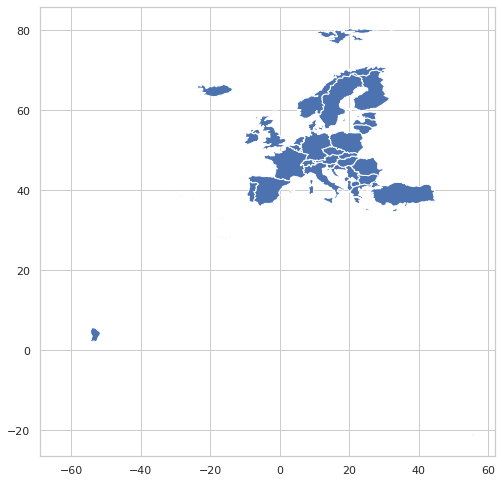

In [190]:
#euro = gpd.read_file(os.path.relpath("Data/ref-countries-2020-10m.geojson/CNTR_BN_10M_2020_3035_INLAND.geojson"))


AttributeError: 'PatchCollection' object has no property 'columns'

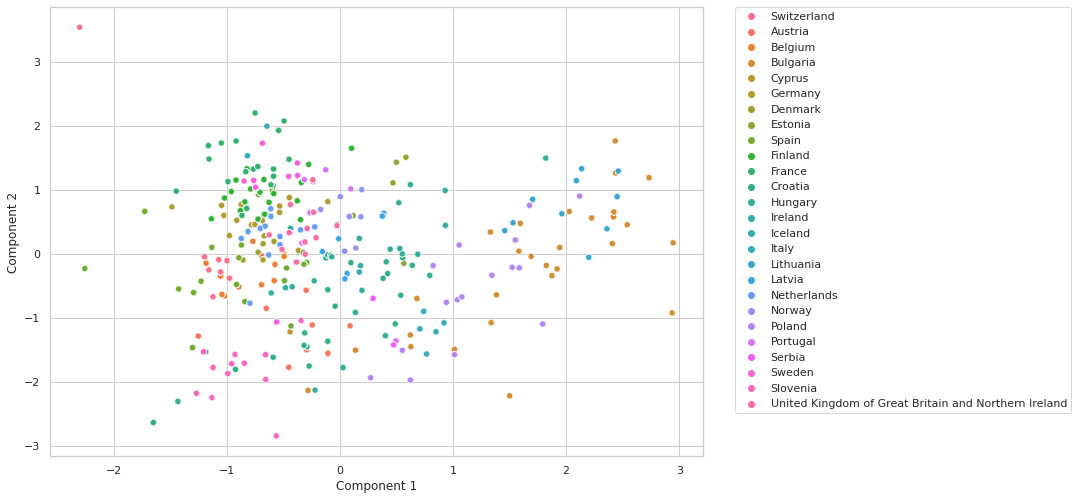

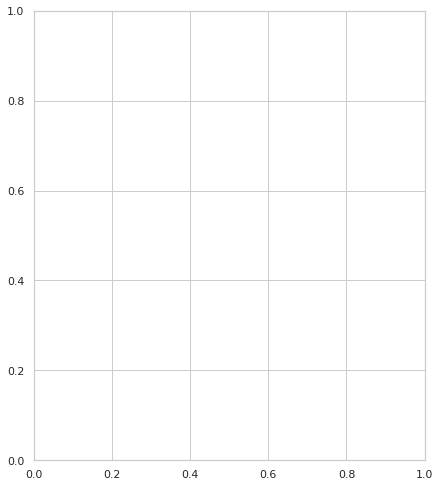

In [194]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.scatterplot(data = ess9cntry, x="Component 1", y="Component 2", hue="Country name");
#sns.set_palette(sns.color_palette(colors[1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

nuts[nuts["LEVL_CODE"]==0].plot(columns = 'cntry');

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.scatterplot(data = ess9cntry, x="Component 1", y="Component 3", hue="Country name");
#sns.set_palette(sns.color_palette(colors[1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

NameError: name 'ess9cntry' is not defined

In [115]:
nuts = gpd.read_file(os.path.relpath("Data/NUTS_RG_20M_2021_4326-20220626.geojson")) 
nuts.head()

In [126]:
ess9nuts = pd.merge(ess9comp, nuts, left_index = True, right_on = 'id')

In [128]:
nuts

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FR,FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((55.21471 -21.03851, 55.27392 -..."
1,HR,HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((16.59681 46.47590, 16.85476 46..."
2,HU,HU,0,HU,Magyarország,Magyarország,0.0,NaN,0,HU,"POLYGON ((22.12108 48.37831, 22.15531 48.40340..."
3,AL,AL,0,AL,Shqipëria,Shqipëria,0.0,NaN,0,AL,"POLYGON ((19.83100 42.46645, 20.07630 42.55582..."
4,AT,AT,0,AT,Österreich,Österreich,0.0,NaN,0,AT,"POLYGON ((15.75363 48.85218, 16.29009 48.73395..."
...,...,...,...,...,...,...,...,...,...,...,...
2005,TRC21,TRC21,3,TR,Şanlıurfa,Şanlıurfa,4.0,2.0,3,TRC21,"POLYGON ((39.85555 37.53101, 40.09329 37.14760..."
2006,TRC22,TRC22,3,TR,Diyarbakır,Diyarbakır,4.0,2.0,3,TRC22,"POLYGON ((41.38055 38.49225, 41.20292 38.31296..."
2007,NO0B2,NO0B2,3,NO,Svalbard,Svalbard,3.0,3.0,1,NO0B2,"MULTIPOLYGON (((32.34411 80.07982, 31.89018 80..."
2008,NO0B,NO0B,2,NO,Jan Mayen and Svalbard,Jan Mayen and Svalbard,NaN,NaN,0,NO0B,"MULTIPOLYGON (((32.34411 80.07982, 31.89018 80..."


<AxesSubplot:>

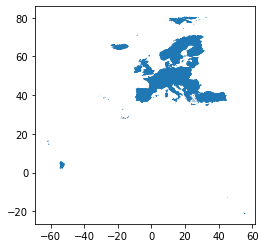

In [122]:
nuts.plot()

AttributeError: 'Line2D' object has no property 'column'

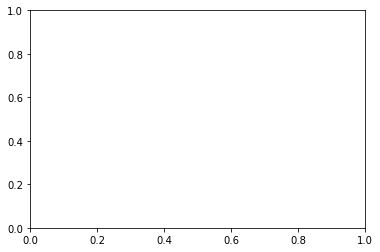

In [124]:
ess9nuts.plot(column = "Component 1")